In [12]:
import pandas as pd


In [13]:
print("Pandas imported successfully.")

Pandas imported successfully.


In [14]:
fake_df = pd.read_csv(r"C:\Users\sinan\Desktop\fake-news-detector\data\Fake.csv")
true_df = pd.read_csv(r"C:\Users\sinan\Desktop\fake-news-detector\data\True.csv")

In [15]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
fake_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [18]:
true_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [19]:
fake_df.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [20]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [21]:
fake_df["label"] = 0   # fake news
true_df["label"] = 1   # real news


In [22]:
df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle


In [23]:
df.head()


,title,text,subject,date,label
0,"Brexit would hurt Britain, EU and global econo...",BERLIN (Reuters) - If Britain were to leave th...,politicsNews,"May 12, 2016",1
1,WHY FINAL “Sunday Night Football” Game Was Can...,The NFL announced Tuesday that the final Sund...,left-news,"Dec 26, 2017",0
2,HEY RACHEL MADDOW…While You’re On The Subject ...,"So Rachel, now that we re on the subject of ta...",left-news,"Mar 15, 2017",0
3,"For Trump, the honeymoon with Putin may be fin...",WASHINGTON (Reuters) - Russian President Vladi...,politicsNews,"July 28, 2017",1
4,Colombia sees peace with ELN rebels harder tha...,BOGOTA (Reuters) - Negotiating peace with Colo...,worldnews,"September 13, 2017",1


In [24]:
df["label"].value_counts()


label
0    23481
1    21417
Name: count, dtype: int64

In [25]:
df["label"].value_counts(normalize=True) * 100


label
0    52.298543
1    47.701457
Name: proportion, dtype: float64

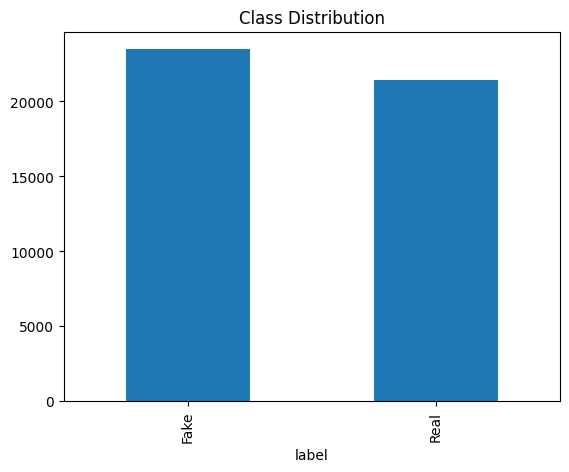

In [26]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Class Distribution")
plt.show()


In [27]:
df["text_length"] = df["text"].astype(str).apply(len)
df[["text_length"]].describe()


,text_length
count,44898.000000
mean,2469.109693
std,2171.617091
min,1.000000
25%,1234.000000
50%,2186.000000
75%,3105.000000
max,51794.000000


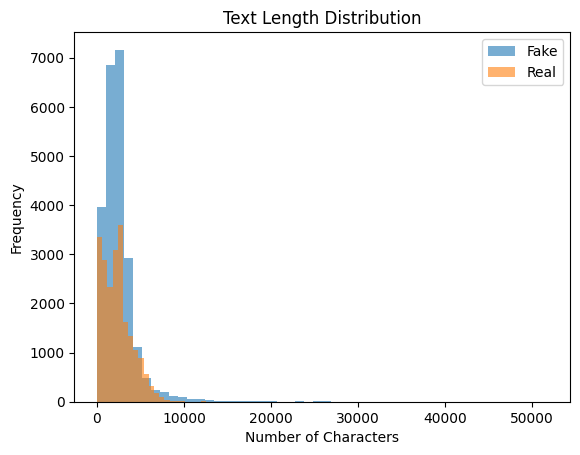

In [28]:
plt.hist(df[df["label"] == 0]["text_length"], bins=50, alpha=0.6, label="Fake")
plt.hist(df[df["label"] == 1]["text_length"], bins=50, alpha=0.6, label="Real")
plt.legend()
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [29]:
df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))
df[["word_count"]].describe()


,word_count
count,44898.000000
mean,405.282284
std,351.265595
min,0.000000
25%,203.000000
50%,362.000000
75%,513.000000
max,8135.000000


C:\Users\sinan\AppData\Local\Temp\ipykernel_15520\1617923541.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["label"]==0]["word_count"],


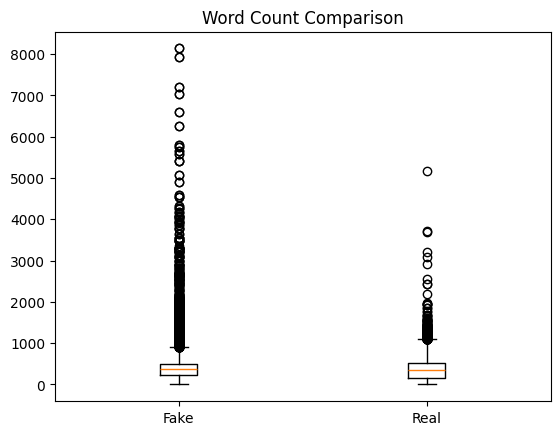

In [30]:
plt.boxplot([df[df["label"]==0]["word_count"],
             df[df["label"]==1]["word_count"]],
            labels=["Fake", "Real"])
plt.title("Word Count Comparison")
plt.show()


## EDA Insights

- Dataset contains both fake and real news articles.
- Class distribution is fairly balanced.
- Real news articles tend to have longer text and higher word counts.
- Fake news articles are generally shorter and more sensational.
- No major missing values observed.


PREPROCESSING

In [31]:
df = df[["text", "label"]]
df.head()


,text,label
0,BERLIN (Reuters) - If Britain were to leave th...,1
1,The NFL announced Tuesday that the final Sund...,0
2,"So Rachel, now that we re on the subject of ta...",0
3,WASHINGTON (Reuters) - Russian President Vladi...,1
4,BOGOTA (Reuters) - Negotiating peace with Colo...,1


In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [33]:
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sinan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


In [35]:
def clean_text(text):
    text = text.lower()                              # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)             # remove punctuation & numbers
    text = re.sub(r"\s+", " ", text).strip()         # remove extra spaces
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) 
             for word in words 
             if word not in stop_words]
    
    return " ".join(words)


In [36]:
df["clean_text"] = df["text"].apply(clean_text)
df.head()


,text,label,clean_text
0,BERLIN (Reuters) - If Britain were to leave th...,1,berlin reuters britain leave european union wo...
1,The NFL announced Tuesday that the final Sund...,0,nfl announced tuesday final sunday night footb...
2,"So Rachel, now that we re on the subject of ta...",0,rachel subject tax president trump paid remind...
3,WASHINGTON (Reuters) - Russian President Vladi...,1,washington reuters russian president vladimir ...
4,BOGOTA (Reuters) - Negotiating peace with Colo...,1,bogota reuters negotiating peace colombia larg...


In [37]:
df.loc[0, "text"]


'BERLIN (Reuters) - If Britain were to leave the European Union, it would hurt Britain and Europe as well as the global economy, the chairman of the White House Council of Economic Advisers told a German newspaper. “You can certainly argue about whether the damage a Brexit would cause would be small, medium or big but it would definitely cause damage, especially for the Brits but also for the Europeans and the global economy,” Jason Furman said in an interview with Handelsblatt. “We don’t need more uncertainty at the moment,” he added. '

In [38]:
df.loc[0, "clean_text"]


'berlin reuters britain leave european union would hurt britain europe well global economy chairman white house council economic adviser told german newspaper certainly argue whether damage brexit would cause would small medium big would definitely cause damage especially brit also european global economy jason furman said interview handelsblatt dont need uncertainty moment added'

df = df.drop(columns=["text"])
df.head()


In [39]:
df.to_csv("cleaned_fake_news.csv", index=False)


## Text Preprocessing Summary

- Converted text to lowercase
- Removed URLs, punctuation, and numbers
- Removed stopwords
- Applied lemmatization
- Created a cleaned text column for modeling


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [41]:
tfidf = TfidfVectorizer(
    max_features=5000,   # keep top 5000 words
    ngram_range=(1, 2)   # unigrams + bigrams
)


In [42]:
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]


In [43]:
X.shape, y.shape


((44898, 5000), (44898,))

In [44]:
tfidf.get_feature_names_out()[:20]


array(['abandon', 'abandoned', 'abbas', 'abc', 'abc news', 'abdullah',
       'abe', 'abedin', 'ability', 'able', 'abortion', 'abroad',
       'absence', 'absolute', 'absolutely', 'abu', 'abuse', 'academic',
       'accept', 'acceptable'], dtype=object)

## TF-IDF Feature Extraction

TF-IDF (Term Frequency–Inverse Document Frequency) converts text data into numerical features.
It assigns higher importance to words that are frequent in a document but rare across the dataset.
This helps machine learning models focus on meaningful terms rather than common words.


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((35918, 5000), (8980, 5000))

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [47]:
y_pred = model.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9922048997772829

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



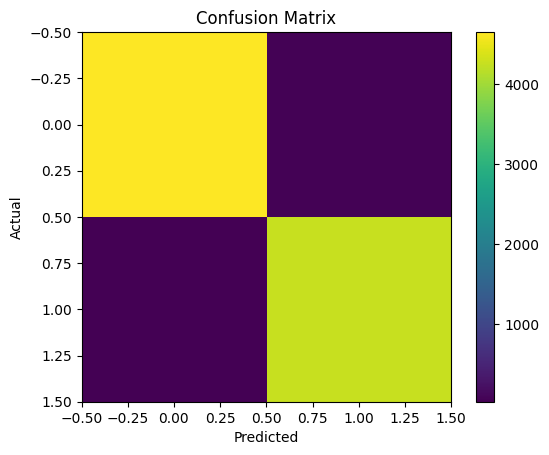

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model Training Summary

- Used TF-IDF for feature extraction
- Trained Logistic Regression classifier
- Achieved high accuracy on test data
- Model performs well in distinguishing fake and real news


In [51]:
import joblib

joblib.dump(model, "fake_news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [52]:
model = joblib.load("fake_news_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")


In [55]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

def predict_news(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)
    return "REAL NEWS 🟢" if prediction[0] == 1 else "FAKE NEWS 🔴"


In [57]:
predict_news("donald trumb is died")

'FAKE NEWS 🔴'